In [1]:
# import libraries
import tensorflow as tf
from keras.datasets import fashion_mnist
import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt

In [2]:
# define variables and hyperparameters
EPOCHS = 100
BATCH_SIZE = 128
N_CLASSES = 10

### Load the dataset

#### Label map:
    0: T-shirt/top
    1: Trouser
    2: Pullover
    3: Dress
    4: Coat
    5: Sandal
    6: Shirt
    7: Sneaker
    8: Bag
    9: Ankle boot


In [3]:
# load the train and test partition of the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

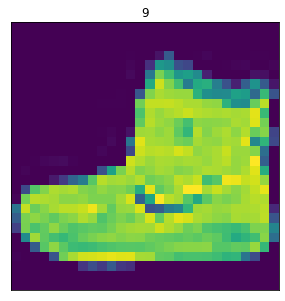

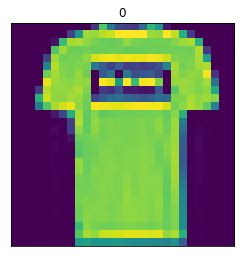

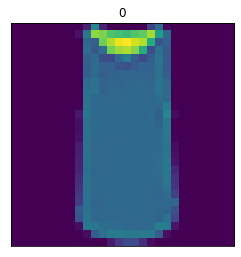

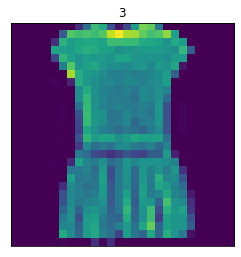

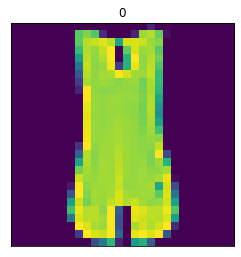

In [4]:
# Visualize some samples of the dataset
for i in range(5):
    plt.matshow(train_images[i])
    plt.title(train_labels[i])
    plt.xticks([])
    plt.yticks([])

### Normlize

In [5]:
# normalize train and test images
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

### Neural Networks

In [18]:
# define the model
model = Sequential()

# Input 
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 1), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Conv Block 1
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(2, 2))

# Conv Block 2
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Flatten
model.add(Flatten())

# Hidden layers
model.add(Dense(256, activation="relu"))
model.add(Dense(512, activation="relu"))

# Avoid overfitting 
model.add(Dropout(0.1))

# output layers
model.add(Dense(N_CLASSES, activation="softmax"))

In [19]:
# compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# see the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 64)        

### Train

In [22]:
# fit the model to training
history=model.fit(train_images, train_labels, epochs = EPOCHS)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9933
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0322 - accuracy: 0.9916
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9935
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9907
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9941
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0326 - accuracy: 0.9928
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9934
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0414 - accuracy: 0.9909
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9936
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9942
Epoch 80/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9928
Epoch 81/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0327 - accuracy: 0.9930
Epoch 82/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9932
Epoch 83/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9928
Epoch 84/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0218 - accuracy: 0.9942
Epoch 85/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9930
Epoch 86/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9943
Epoch 87/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0371 - accuracy: 0.9920
Epoch 88/100
1875/1875 [==============================] - 8s 5ms/step - loss:

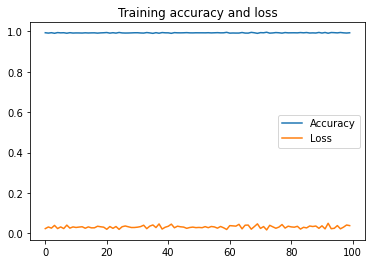

<Figure size 432x288 with 0 Axes>

In [23]:
# see a graph of model's loss and accuracy

plt.plot(range(EPOCHS), history.history["accuracy"], label="Accuracy")
plt.plot(range(EPOCHS), history.history["loss"], label="Loss")

plt.legend(loc="center right")
plt.title("Training accuracy and loss")

plt.show()

# save the plot
plt.savefig("training_history.png")

### Test model

In [25]:
# make model to predict
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.8358 - accuracy: 0.9078


[1.8357816934585571, 0.907800018787384]

### Save

In [26]:
# save the model
model.save("classification.h5")

### Test the model

In [27]:
# load the model
model = load_model("classification.h5")

1/1 [==============================] - 0s 16ms/step


C:\Users\yasin\AppData\Roaming\Python\Python310\site-packages\keras\utils\image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


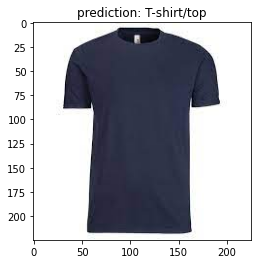

In [50]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image


# make single image prediction
org_image = Image.open("cloth1.jpg")
img = image.load_img(path="cloth1.jpg", grayscale=True, target_size = (28, 28))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
output = np.argmax(model.predict(img))

# define labelmap
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# plot the prediction
plt.imshow(org_image)
plt.title(f"prediction: {label_map[output]}")